In [ ]:
from IPython.display import display, Math, Latex

# Libraries you might need
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns

In [ ]:
# You can use this function for plotting raster plots (spikes), or you can use your own defined function
def raster(event_times_list, color='k', t_min= 0., t_max=10., ax=None):
    """
    Creates a raster plot
    Parameters
    ----------
    event_times_list : iterable
                       a list of event time iterables
    color : string
            color of vlines
    Returns
    -------
    ax : an axis containing the raster plot
    https://scimusing.wordpress.com/2013/05/06/making-raster-plots-in-python-with-matplotlib/
    """
    if ax is None:
        ax = plt.gca()
    for ith, trial in enumerate(event_times_list):
        ax.vlines(trial, ith + .5, ith + 1.5, color=color)
    ax.set_ylim(.5, len(event_times_list) + .5)
    ax.set_yticks([])
    ax.set_ylabel('Spike train')
    ax.set_xlim((t_min, t_max))
    ax.set_xlabel('Time [s]')
    return ax

### Homework 2

__1. Generation of inhomogeneous Poisson process__. Consider an inhomogeneous Poisson process with instanteneous firing rate $\lambda: \mathbb{R} \to \mathbb{R}^+$ such that $\lambda(t) = \lambda_{max} (t-1)^2$, where $t$ is measured in seconds, $\lambda$ in Herz [Hz].

In exercise (a) - (d), generate $N = 100$ spike trains for $\lambda_{max} = 100$ Hz. Plot the raster plot, the numeric approximation of the rate and for comparison the analytic rate given in the exercise.
A numeric approximation of the rate $\tilde\lambda$ can be computed by binning the data into 100 bins on the interval $[t_\min, t_\max]$ for each spike train (bin size $\Delta t = \frac{t_\max-t_\min}2$) and computing the number of spikes in all spike trains within the bin, devided by $N$ and the bin size: $\tilde\lambda = \frac{\#spikes}{N \cdot \Delta t}$.

*Hint: Compute the analytical integral of the rate function. Write a function both for the rate function and its integral.*

In [ ]:
def rate(t, rate_max):
    return

def indefinite_integral(t, rate_max):
    return

def rate_integral(t_min, t_max, rate_max):
    return indefinite_integral(t_max, rate_max) - indefinite_integral(t_min, rate_max)

rate_max = 100
n_trials = 100
t_min = 0
t_max = 2
bins_count = np.linspace(t_min, t_max, 101)
bin_size = bins_count[1] - bins_count[0]

__a) Temporal distribution method:__ As in the lecture: first find number of spikes $k$ by drawing from Poisson distribution with parameter $\mu = \int_{t_\min}^{t_\max} \lambda(t) dt $, and then draw spike times using a density function $\lambda(t)/\mu$. _(2 points)_

*Hint: Choose an appropriate method for drawing from an arbitrary probability density, e.g., rejection sampling.*

In [ ]:
# compute

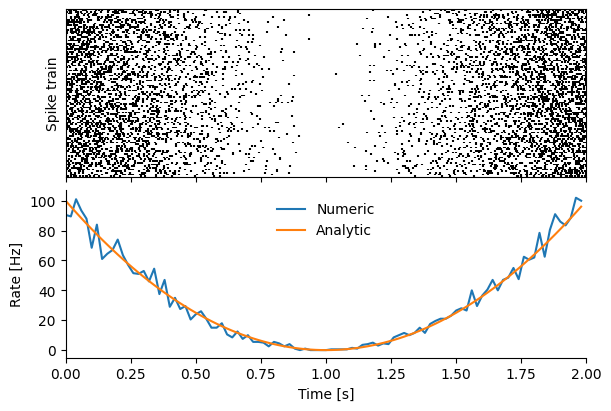

In [ ]:
# plot

__b) Bernoulli method:__ Discretize time into $m$ bins. For each bin $j = 1, \ldots, m$ draw a sample $k_i$ from a Poisson spike count distribution in that bin ( Poisson distribution with the parameter equal to integral of the $\lambda(t)$ over the bin). Generate a single spike in each bin with $k_i > 0$ drawing its time-stamp from uniform distribution within this bin. Generate rasters and estimated rate for $m = 10, \: 100, \: 1000, \: 10000.$ _(2 points)_

*Note: The bin count for computing a numerical approximation of the rate is still the same as above.*

In [ ]:
# compute

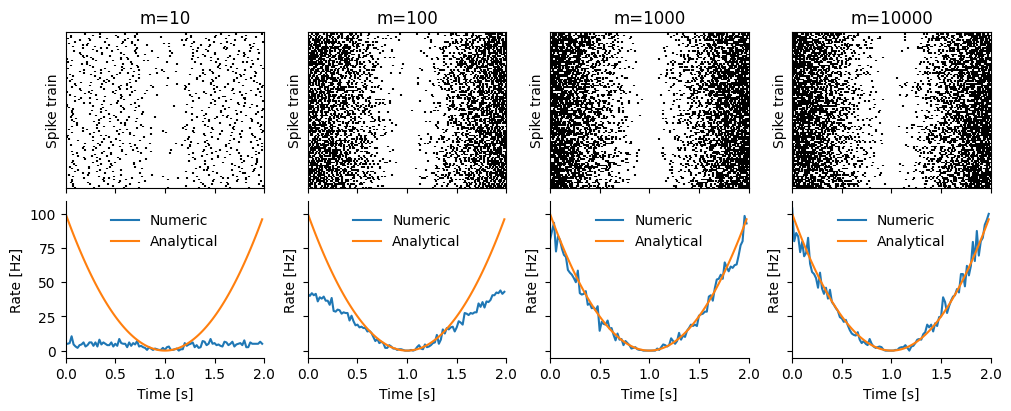

In [ ]:
# plot

__c) Thinning method:__ First generate a spike train from a Poisson process of rate $\lambda_{max}$ and then iterate through all spikes $l = 1, \ldots, k$ and randomly delete them with probability $1 - \lambda(t^\star_l) /\lambda_{max}$, where $t^\star_l$ is a time point of the $l$-th spike (before thinning). _(2 points)_

In [ ]:
def poisson_spike_train(tau, t_min, t_max, n_trials):
    return

In [ ]:
# compute

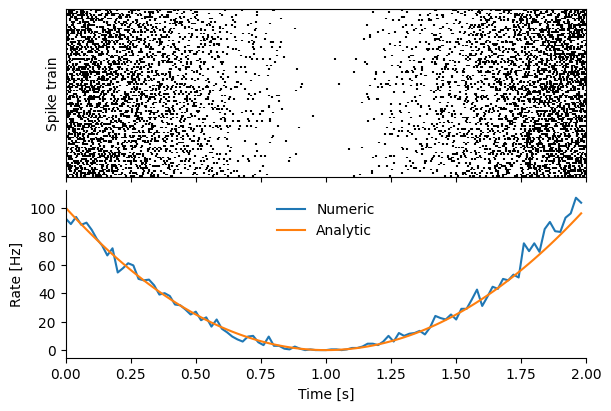

In [ ]:
# plot

__d) Renewal and time rescaling method:__ Compute $\mu(t) = \int_{t_\min}^t \lambda(s) ds$. Generate a spike train for a homogeneous Poisson process with rate $1$ on an interval $[0,\mu(t_\max)]$ (using inter-spike interval distribution as in the previous homework). Resulting spike times we call $s_l^\star$. We can then find corresponding pre-images $t_l^\star = \mu^{-1}(s_l^\star) \in [t_\min,t_\max].$ _(2 points)_

Hint: Options for inverting functions:
- Invert $\mu(t)$ analytically and write a function. Of course, you can use any tools that you want. Remember to write your solution concisely including necessary intermediate steps.*
- You can also use "sympy" library to create symbolic equations and then find the inverse function using those symbolic equations _(2 points)_
- To find the inverse of a polynomial function at a specific value you can use function np.roots (https://docs.scipy.org/doc/numpy/reference/generated/numpy.roots.html ). You will need a real root within the interval $[t_\min,t_\max]$.

**Answer:**

TODO

In [ ]:
# compute

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/numpy/ma/core.py:3413: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


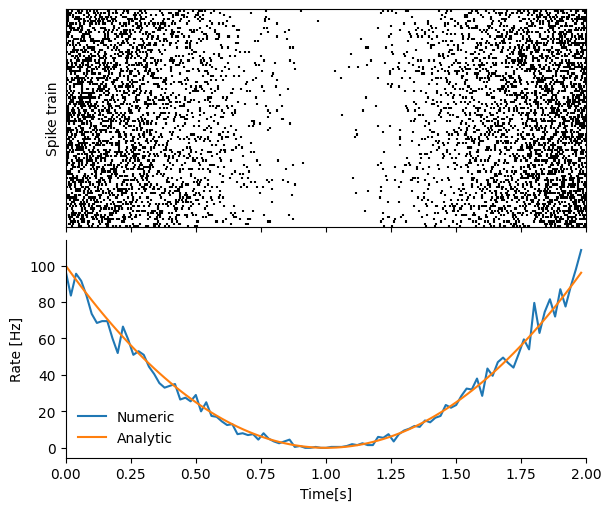

In [ ]:
# plot

__2. Variance of the firing rate a)__. Determine the variance of the firing rate (across the bins) using $b = 10, \: 50, \:100$ bins from spike trains generated by method 1.a) using the law of total variance  _(2 points)_

**Answer:**

Formulas I need...

In [ ]:
# compute and print my solution

n_bin=10
mean spike counts = 67.27
var of spike counts = 38.30722222222222
var of firing rate = 789.5055555555554
--------------------
n_bin=50
mean spike counts = 66.28
var of spike counts = 2.588130612244898
var of firing rate = 789.0816326530612
--------------------
n_bin=100
mean spike counts = 67.42
var of spike counts = 0.9757656565656566
var of firing rate = 753.9141414141413
--------------------


__2. Variance of the firing rate b)__. Compare results from 2.a) with analytical variance of the rate. To compute the analytical variance use the true formula for the time-dependent rate $\lambda(t) = \lambda_{max} (t-1)^2$ and treat it as a random variable for the time $t$ uniformly distributed in $[t_\min,t_\max]$. \\
_(2 points)_

\begin{equation*}
\begin{split}
Var(\lambda)
&= ... \\
&= \lambda_\max^2 \frac4{45}\\
&= 888.89
\end{split}
\end{equation*}